In [42]:
from tensorflow.keras.layers import Input,Dense,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.applications import vgg16,mobilenet
from tensorflow.image import resize
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2


3. Build a CNN having a pre-trained MobileNet as backbone to classify 10 classes.


In [43]:
def display_image(img_set,title_st):
    n=len(title_st)
    for i in range(n):
        plt.subplot(3,3,i+1)
        plt.imshow(img_set[i],cmap='gray')
        plt.title(title_st[i])
    plt.show()
    plt.close()

In [44]:
vgg16_model=vgg16.VGG16()
# vgg16_model.summary()

In [45]:
mobilenet_model=mobilenet.MobileNet()
# mobilenet_model.summary()

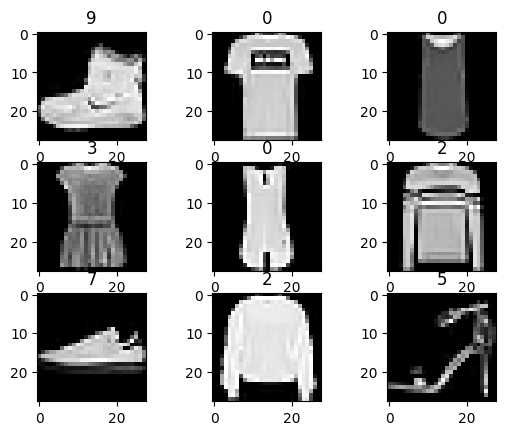

In [46]:
(trainX,trainY),(testX,testY)=load_data()
display_image(trainX[:9],trainY[:9])

In [8]:
trainX= np.expand_dims(trainX,axis=-1)
testX=np.expand_dims(testX,axis=-1)

trainX= np.array([cv2.resize(image, (256, 256)) for image in trainX])
if trainX.shape[-1] == 1:
    trainX = np.repeat(trainX, 3, axis=-1)

trainX = preprocess_input(trainX)

trainY=to_categorical(trainY,num_classes=10)
testY=to_categorical(testY,num_classes=10)

In [37]:
vgg16_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
inputs=vgg16_model.inputs
x=vgg16_model.output
x=Conv2D(filters=8,kernel_size=(5,5),activation='relu')(x)
x=Conv2D(filters=10,kernel_size=(3,3),activation='relu')(x)
x=Flatten()(x)
x=Dense(256,activation='relu')(x)
outputs=Dense(10,activation='softmax',name='OutputLayer')(x)
model=Model(inputs,outputs,name='Pre-trained VGG and create CNN')
# model.summary()

In [10]:
vgg16_model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
# vgg16_model.fit(trainX,trainY,batch_size=32,validation_split=0.1,epochs=10)

In [ ]:


vgg16_model.fit(trainX, trainY, batch_size=32, validation_split=0.1, epochs=10)


MobineNet

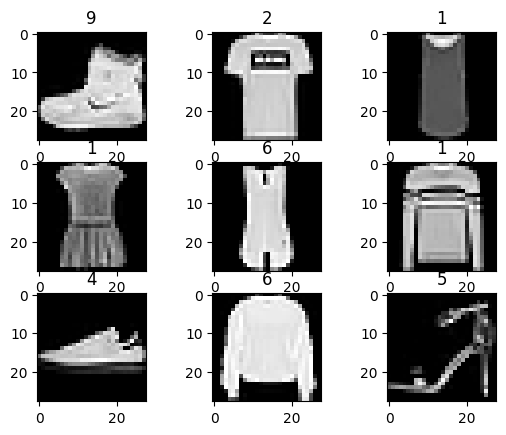

In [63]:
(trainX,trainY),(testX,testY)=load_data()
display_image(trainX[:9],testY[:9])

In [82]:
# trainX = np.expand_dims(trainX, axis=-1)
# testX = np.expand_dims(testX, axis=-1)

trainX = trainX/255.0
testX = testX/255.0
trainX = np.squeeze(trainX)
testX = np.squeeze(testX)
print("Train shape:", trainX.shape)
print("Test shape:", testX.shape)

trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


MemoryError: Unable to allocate 44.7 GiB for an array with shape (600000000, 10) and data type float64

In [84]:
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(32,32, 3))
inputs = mobilenet_model.input
x = mobilenet_model.output

x = Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(x)
x = Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(x)

x = Flatten()(x)
x = Dense(15,activation='relu')(x)

output = Dense(10,activation='softmax')(x)
model = Model(inputs,output,name='MobileNet')
model.summary()

/tmp/ipykernel_5940/3321405931.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(32,32, 3))


Model: "MobileNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,244,399 (12.38 MB)

 Trainable params: 3,222,511 (12.29 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [79]:
mobilenet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mobilenet_model.fit(trainX,trainY,batch_size=32,validation_split=0.1,validation_data=(testX,testY),epochs=10)

Epoch 1/10


ValueError: Input 0 of layer "mobilenet_1.00_224" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 28, 28)